### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn import preprocessing

In [2]:
%matplotlib inline

In [3]:
path = 'C:\\Users\\Marce\\careerfoundry\\World Food fit'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'currencyrdy.csv'))

In [5]:
pd.set_option('precision', 0)

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
df.shape

(107108, 5)

In [8]:
df.head()

,Country,Product/Category,Month,Year,PriceUSD
0,Afghanistan,Bread - Retail,Jan,2000,0.178
1,Afghanistan,Bread - Retail,Jan,2001,0.208
2,Afghanistan,Bread - Retail,Jan,2002,0.106
3,Afghanistan,Bread - Retail,Jan,2003,0.151
4,Afghanistan,Bread - Retail,Jan,2004,0.175


In [9]:
df.columns

Index(['Country', 'Product/Category', 'Month', 'Year', 'PriceUSD'], dtype='object')

In [10]:
df.isnull().sum()

Country                0
Product/Category       0
Month                  0
Year                   0
PriceUSD            5316
dtype: int64

In [11]:
df['PriceUSD'].fillna(df['PriceUSD'].median(),inplace=True)

In [12]:
d={
'Jan':1,
'Feb':2,
'Mar':3,
'Apr':4,
'May':5,
'Jun':6,
'Jul':7,
'Aug':8,
'Sep':9,
'Oct':10,
'Nov':11,
'Dec':12
}

In [13]:
df.Month = df.Month.map(d)

In [14]:
df2 = df[df['Product/Category'].isin(['Wheat flour - Retail','Sugar - Retail','Rice - Retail'])]

In [15]:
df3 = df2[['Month','Year','PriceUSD']]

In [16]:
df3.isnull().sum()

Month       0
Year        0
PriceUSD    0
dtype: int64

In [17]:
df3.head()

,Month,Year,PriceUSD
750,1,2021,0.589
751,2,2021,0.587
752,3,2021,0.583
753,4,2021,0.585
754,5,2020,0.569


In [18]:
df3['Month'].value_counts

<bound method IndexOpsMixin.value_counts of 750        1
751        2
752        3
753        4
754        5
          ..
107103     8
107104     9
107105    10
107106    11
107107    12
Name: Month, Length: 7623, dtype: int64>

### 2. The elbow technique

In [19]:
# define range of potential clusters
num_cl = range(1, 5)

# define k-means clusters in the range from above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [20]:
# create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df3).score(df3) for i in range(len(kmeans))]

score

[-1248823.797242118,
 -453254.73478307365,
 -331322.45344474906,
 -247430.4598947188]

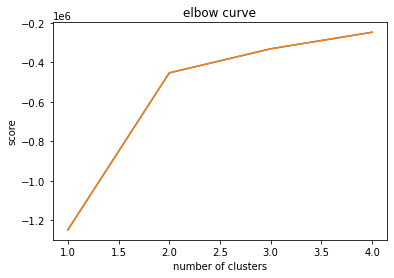

In [21]:
# Plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('number of clusters')
pl.ylabel('score')
pl.title('elbow curve')
pl.plot(num_cl,score)
pl.show()

# breakpoint is clearly 2, that's why I chose 2

### 3. k-means clustering

In [22]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2, n_jobs = -1) 

In [23]:
kmeans.fit(df3)

C:\Users\Marce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=2, n_jobs=-1)

In [24]:
df3['clusters'] = kmeans.fit_predict(df3)

C:\Users\Marce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Marce\AppData\Local\Temp/ipykernel_9500/2121862071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['clusters'] = kmeans.fit_predict(df3)


In [25]:
df3.head(5)

,Month,Year,PriceUSD,clusters
750,1,2021,0.589,0
751,2,2021,0.587,0
752,3,2021,0.583,0
753,4,2021,0.585,0
754,5,2020,0.569,0


In [26]:
df3["clusters"].value_counts()

0    7600
1      23
Name: clusters, dtype: int64

In [27]:
df3.describe()

,Month,Year,PriceUSD,clusters
count,7623.000,7623.000,7623.000,7623.000
mean,6.421,2013.803,1.888,0.003
std,3.434,4.953,11.292,0.055
min,1.000,1994.000,0.054,0.000
25%,3.000,2011.000,0.465,0.000
50%,6.000,2014.000,0.698,0.000
75%,9.000,2018.000,0.892,0.000
max,12.000,2021.000,243.038,1.000


In [28]:
df3.median()

Month         6.000
Year       2014.000
PriceUSD      0.698
clusters      0.000
dtype: float64

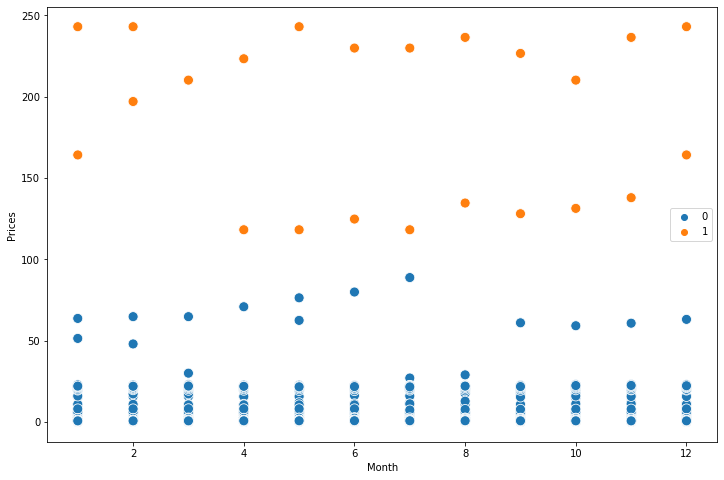

In [29]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df3['Month'], y=df3['PriceUSD'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Month') # Label x-axis.
plt.ylabel('Prices') # Label y-axis.
plt.savefig('cluster.png')
plt.show()

In [30]:
df3.loc[df3['clusters'] == 0, 'clusters'] = 'red'
df3.loc[df3['clusters'] == 1, 'clusters'] = 'blue'

C:\Users\Marce\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [31]:
df3.groupby('clusters').agg({'Month':['mean', 'median'],
                         'PriceUSD':['mean', 'median'], 
                         'Year':['mean', 'median']})

Month        PriceUSD             Year         
          mean median     mean  median     mean   median
clusters                                                
blue     6.652  7.000  187.490 210.195 2007.696 2008.000
red      6.421  6.000    1.326   0.696 2013.821 2014.000

###

###